# Dimension reduction

Dimensionality is defined as the number of features per instance in a dataset. Dimensionality plays an important role in the following:

* Visualisation - it becomes non-trivial to visualise data with more than 3 dimensions
* Overfitting - Caused by small number of instances with high dimensionality see [here](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/) for a nice example
* Uneven sparsity in the feature space
* Training time
* Storage

## The "curse of dimensionality"

As the number of dimensions grows, the more difficult classification and clustering becomes.

[Further reading (Wikipedia)](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

## Mitigations

* Feature selection
* Feature projection N->K (linear combinations of features) -> *transformation*
* Cross-validation (classification overfitting only)

# Feature selection

* Let's go through some examples of sklearn's [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)

In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

# Let's do some feature selection on iris
iris = load_iris()
X, y = iris.data, iris.target

print("x", X.shape)
print("y", y.shape)

print(X.shape)

skb = SelectKBest(chi2, k=2)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
np.array(iris.feature_names)[skb.get_support(indices=True)]

x (150, 4)
y (150,)
(150, 4)
(150, 2)


array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

# Feature transformations and projections

We'll project our data into a 3-dimensional space suitable for visualisation using principal components analysis (PCA).

* Example from [here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)
* [More information on PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

## Iris dataset

Original space: (150, 4)
PCA space: (150, 3)
Original feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']


<ipython-input-2-650af738a2d0>:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


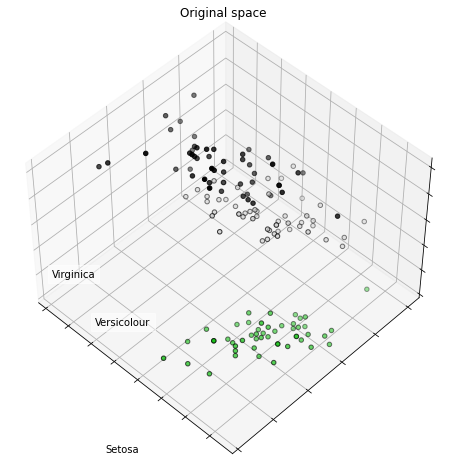

<ipython-input-2-650af738a2d0>:74: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0]).astype(np.float)


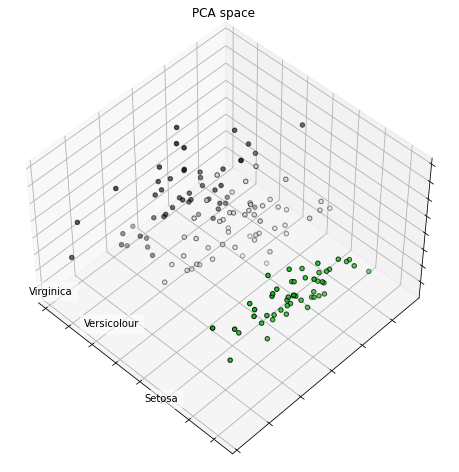

[0, 1, 3]

In [2]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Original space:",X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:",Xpca.shape)

#########################
# Plot originals
#########################
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# Vis some rando features
f = sorted(np.random.permutation(X.shape[1])[1:4])
print("Original feature names: ",[iris.feature_names[i] for i in f])

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, f[0]].mean(),
              X[y == label, f[1]].mean() + 2,
              X[y == label, f[2]].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, f[0]], X[:, f[1]], X[:, f[2]], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("Original space")

plt.draw()
plt.show()

#########################
# Plot PCA
#########################
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# Reset y from np.choose() above
y = iris.target

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax2.text3D(Xpca[y == label, 0].mean(),
              Xpca[y == label, 1].mean() + 2,
              Xpca[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the ls to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax2.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")

plt.draw()
plt.show()
f

## Digits dataset example

* [About the dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)
* [More visualisations](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)

Original space: (1797, 64)
PCA space: (1797, 3)
Original features (pixel index):  [1, 11, 28]


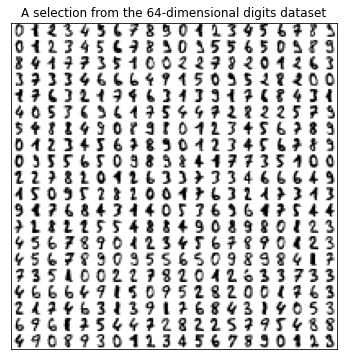

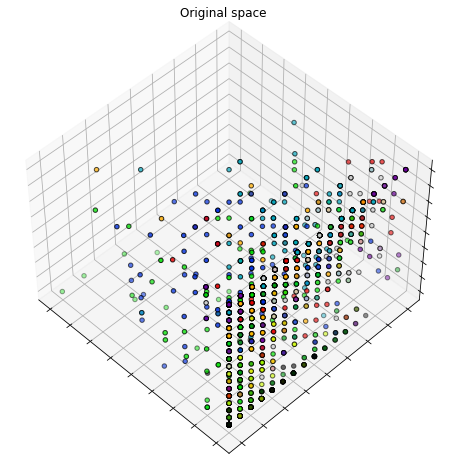

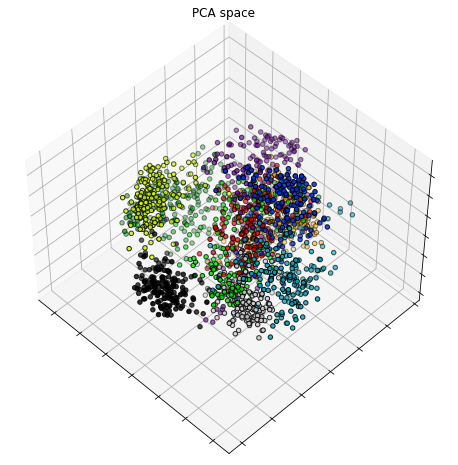

In [3]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

#np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
digits = datasets.load_digits()
X = digits.data
y = digits.target

print("Original space:", X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:", Xpca.shape)

#########################
# Plot images of the digits
#########################
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(0, figsize=(8, 6))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

#########################
# Plot originals (this will be mostly meaningless)
#########################
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)

# Vis some rando features
f = sorted(np.random.permutation(64)[1:4])
print("Original features (pixel index): ",f)

ax.scatter(X[:, f[0]], X[:, f[1]], X[:, f[2]], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("Original space")

plt.draw()
plt.show()

#########################
# Plot PCA
#########################
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=135)

plt.cla()

ax2.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])
ax2.set_title("PCA space")

plt.draw()
plt.show()

## Iris dataset example

Let's see what the most important two principal components are for the Iris dataset.

In [4]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))


      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.521066         -0.269347           0.580413          0.564857
PC-2           0.377418          0.923296           0.024492          0.066942


# Pipelines

A 'sklearn.pipeline.Pipeline' can be used to preprocess the features before classification or clustering. NB: For classification our dataset needs labels in 'y'.

See the [Pipeline documentation](http://scikit-learn.org/stable/modules/pipeline.html#pipeline)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits
digits = load_digits()
pca1 = PCA(n_components=3)
svm1 = SVC()
pipe = Pipeline([('reduce_dim', pca1), ('clf', svm1)])
pipe.fit(digits.data, digits.target)

print(pca1.components_.shape)
print(pca1.transform(digits.data).shape)

(3, 64)
(1797, 3)


# Weka machine learning toolkit

* [Download Weka](https://www.cs.waikato.ac.nz/~ml/weka/)
* [Data mining with Weka video series](https://www.youtube.com/user/WekaMOOC)

# Exercise 6

For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?